# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Timothée\AppData\Local\Temp\ipykernel_4484\2660915427.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Taux d'emploi

## Niveau régional

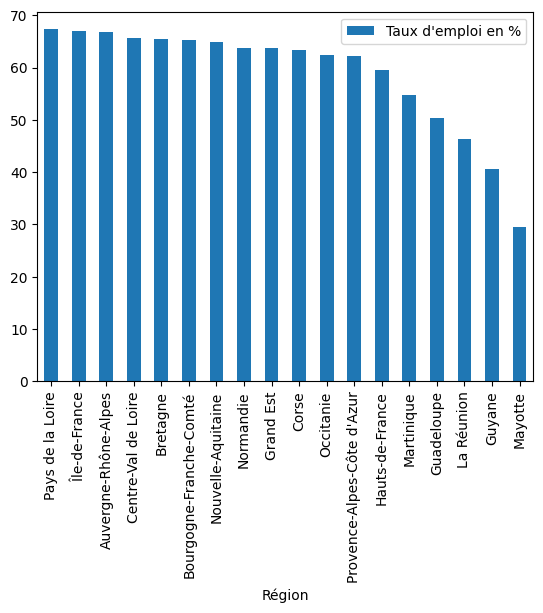

In [2]:
df_emploi = pd.read_excel('Emploi/Emploi.xlsx')
df_emploiReg = df_emploi.drop([7, 8, 9])
df_emploiReg.plot(kind = 'bar', x = 'Région', y = "Taux emploi")
legend = plt.legend(["Taux d'emploi en %"])

## Niveau national

<Axes: xlabel='Région'>

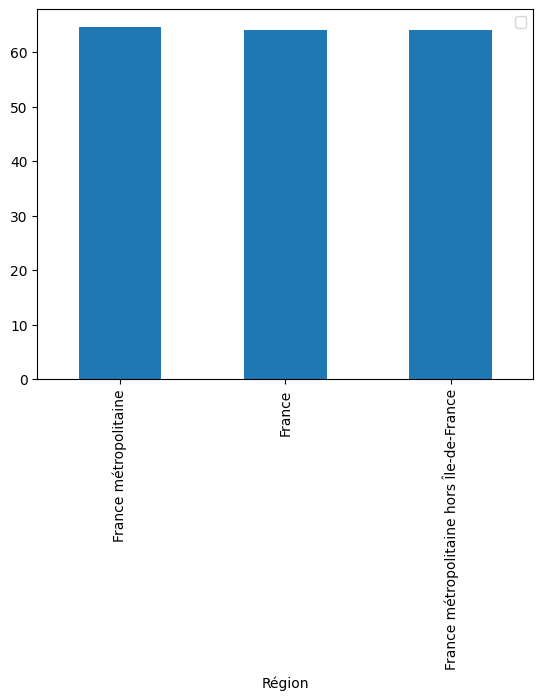

In [3]:
df_emploiNat = df_emploi.iloc[7:10, 0:2]
df_emploiNat.head()
df_emploiNat.plot(kind = 'bar', x = 'Région', y = "Taux emploi", label = "_nolegend_")

# Population en âge de travailler par habitant

## Niveau régional

<Axes: xlabel='Région'>

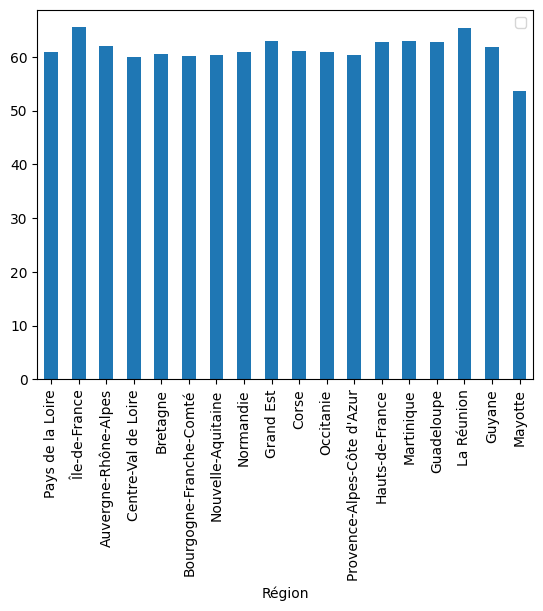

In [4]:
df_emploiReg.plot(kind = 'bar', x = 'Région', y = 'Population en âge de travailler par habitant', label = "_nolegend_")
# legend = plt.legend(["Population en âge de travailler par habitant en %"])

## Niveau national

<Axes: xlabel='Région'>

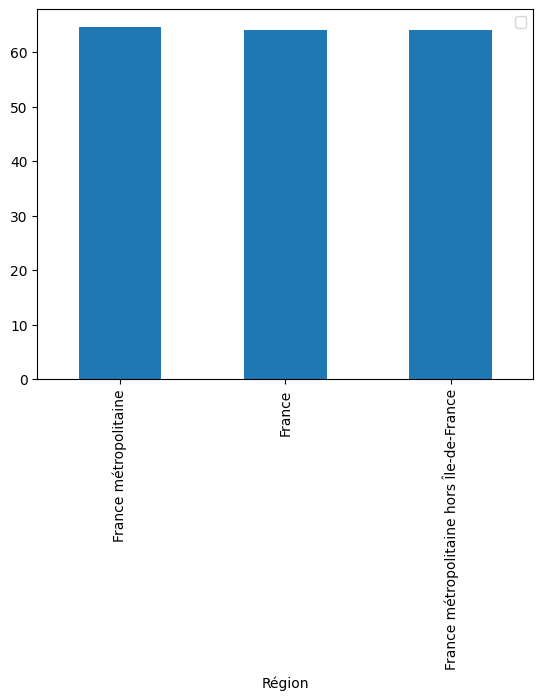

In [5]:
df_emploiNat.plot(kind = 'bar', x = 'Région', y = "Taux emploi", label = "_nolegend_")

## Prédictions pour le taux d'emploi

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

Prédiction de l'inflation en 2027 : 4.617142857142767
Coefficient de détermination (R²) en % : nan
Erreur quadratique moyenne: 0.04285714285724662


c:\Users\Timothée\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


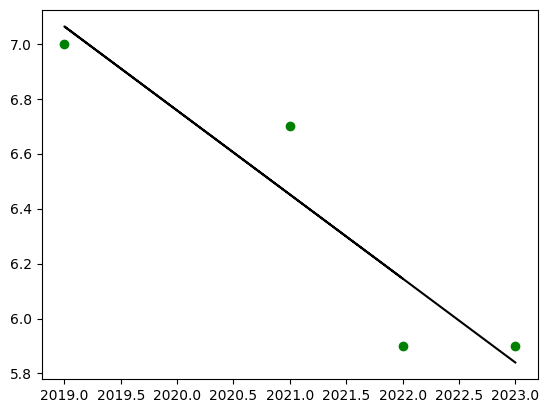

In [22]:
df_BZH = pd.read_excel('./Emploi/Chomage_Bretagne.xlsx')

# Génération d'un jeu d'entraînement et de test
train_data, test_data, train_target, test_target = train_test_split(df_BZH[['Année']].values, df_BZH['Taux de chomage'].values, test_size=0.2, random_state=42)

# Création et entraînement du modèle
model = LinearRegression()
model.fit(train_data, train_target)

# Prédiction sur l'ensemble de test
y_pred = model.predict(train_data)

region_prediction = 2027

prediction_emploi = model.predict([[region_prediction]])
print(f"Prédiction de l'inflation en {region_prediction} : {prediction_emploi[0]}")

# Évaluation de la précision
test_pred = model.predict(test_data)
r_squared = r2_score(test_target, test_pred)
print(f'Coefficient de détermination (R²) en % : {r_squared*100}' )
mse = mean_absolute_error(test_target, test_pred)
print("Erreur quadratique moyenne:", mse)

# plt.plot(df_BZH[['Année']], df_BZH['Taux de chomage'], y_pred)
plt.scatter(train_data, train_target, color='g')
plt.plot(train_data, y_pred, color='k')

plt.show()